In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

In [184]:
dataset = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label' , 'message'])

In [185]:
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [186]:
dataset.shape

(5572, 2)

In [187]:
freq = dataset['label'].value_counts()
freq

label
ham     4825
spam     747
Name: count, dtype: int64

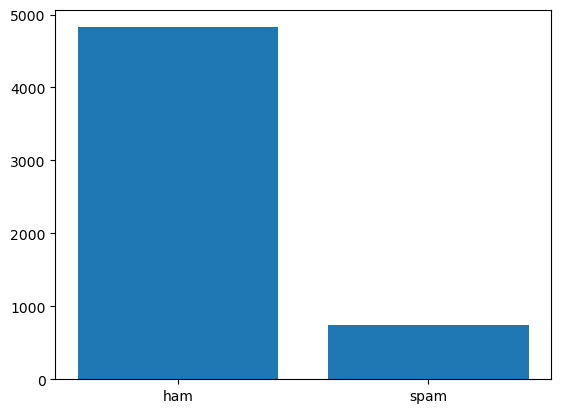

In [188]:
mpl.bar(freq.index , freq.values)
mpl.show()

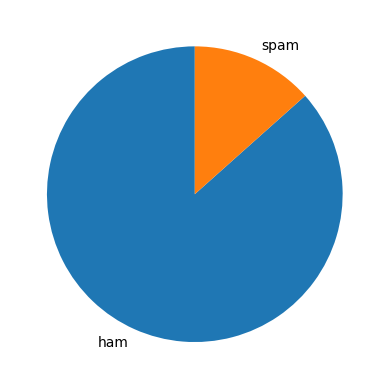

In [189]:
mpl.pie(freq.values, labels=freq.index, startangle=90)
mpl.show()

In [192]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [193]:
msg = "How are You ?"

In [194]:
from nltk.tokenize import word_tokenize


In [195]:
words = word_tokenize(msg)
words

['How', 'are', 'You', '?']

In [196]:
from nltk.corpus import stopwords

In [197]:
stopwords = stopwords.words('english')

In [198]:
clean_words = [word for word in words if word not in stopwords]
clean_words

['How', 'You', '?']

In [199]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [200]:
clean_words = [ps.stem(word) for word in words if word not in stopwords]
clean_words

['how', 'you', '?']

In [201]:
def preprocessing(text):
    words = word_tokenize(text)
    clean_words = [word for word in words if word not in stopwords]
    clean_words = [ps.stem(word) for word in words if word not in stopwords]
    return ' '.join(clean_words)

In [202]:
dataset['message_clean'] = dataset['message'].apply(preprocessing)

In [203]:
dataset.head()

,label,message,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...","go jurong point , crazi .. avail bugi n great ..."
1,ham,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i n't think goe usf , live around though"


In [204]:
from sklearn.feature_extraction.text import CountVectorizer

In [205]:
vectorizer = CountVectorizer(max_features=1000)

In [206]:
vocab = vectorizer.fit(dataset['message_clean'])
vocab.vocabulary_

{'go': 361,
 'point': 659,
 'crazi': 211,
 'avail': 95,
 'great': 371,
 'world': 974,
 'got': 369,
 'wat': 928,
 'ok': 605,
 'lar': 470,
 'joke': 451,
 'wif': 953,
 'free': 332,
 'entri': 285,
 'wkli': 966,
 'comp': 188,
 'win': 957,
 'final': 316,
 'may': 526,
 'text': 841,
 'receiv': 694,
 'question': 680,
 'std': 808,
 'txt': 889,
 'rate': 686,
 'appli': 80,
 'dun': 266,
 'say': 736,
 'earli': 268,
 'alreadi': 62,
 'nah': 571,
 'think': 852,
 'goe': 363,
 'usf': 905,
 'live': 493,
 'around': 86,
 'though': 855,
 'freemsg': 333,
 'hey': 401,
 'week': 935,
 'word': 972,
 'back': 103,
 'like': 488,
 'fun': 344,
 'still': 809,
 'xxx': 985,
 'send': 751,
 '50': 29,
 'even': 288,
 'brother': 134,
 'speak': 799,
 'they': 849,
 'treat': 879,
 'as': 87,
 'per': 641,
 'request': 708,
 'set': 755,
 'callertun': 147,
 'caller': 146,
 'press': 667,
 'copi': 202,
 'friend': 337,
 'winner': 959,
 'valu': 909,
 'network': 577,
 'custom': 216,
 'select': 747,
 '900': 37,
 'prize': 672,
 'reward': 71

In [207]:
Features = vectorizer.fit_transform(dataset['message_clean']).toarray()

In [208]:
Features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [209]:
Features.shape

(5572, 1000)

In [210]:
from sklearn.preprocessing import LabelEncoder

In [211]:
dataset['encoded_labels'] = LabelEncoder().fit_transform(dataset['label'])

In [212]:
dataset.head()

,label,message,message_clean,encoded_labels
0,ham,"Go until jurong point, crazy.. Available only ...","go jurong point , crazi .. avail bugi n great ...",0
1,ham,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i n't think goe usf , live around though",0


In [213]:
Labels = dataset['encoded_labels']

In [214]:
Labels

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: encoded_labels, Length: 5572, dtype: int32

In [215]:
Features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
Feature_train , Feature_test , Label_train , Label_test = train_test_split(Features , Labels , test_size = 0.2)

In [218]:
from sklearn.naive_bayes import GaussianNB

In [219]:
model = GaussianNB()

In [220]:
model.fit(Feature_train , Label_train)

GaussianNB()

In [221]:
Predictions = model.predict(Feature_test)

In [222]:
Predictions

array([0, 1, 0, ..., 0, 0, 0])

In [223]:
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

In [224]:
Score = accuracy_score(Label_test , Predictions)
Score

0.7766816143497758

In [225]:
Report = classification_report(Label_test , Predictions)
Report

'              precision    recall  f1-score   support\n\n           0       0.98      0.76      0.86       975\n           1       0.35      0.91      0.51       140\n\n    accuracy                           0.78      1115\n   macro avg       0.67      0.84      0.68      1115\nweighted avg       0.90      0.78      0.81      1115\n'

In [226]:
Matrix = confusion_matrix(Label_test , Predictions)
Matrix

array([[738, 237],
       [ 12, 128]], dtype=int64)

In [227]:
from sklearn.model_selection import cross_val_score

In [228]:
scores = cross_val_score(model, Feature_train, Label_train, cv=5, scoring='accuracy')
scores

array([0.79820628, 0.82959641, 0.80583614, 0.79349046, 0.8013468 ])

In [229]:
Predictions2 = model.predict(Feature_train)

In [230]:
accuracy2 = accuracy_score(Label_train , Predictions2)
accuracy2

0.7973973524792461

In [231]:
Matrix2 = confusion_matrix(Label_train , Predictions2)
Matrix2

array([[2947,  903],
       [   0,  607]], dtype=int64)

In [232]:
Email = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [233]:
Email_Clean = preprocessing(Email)

In [234]:
Email_Clean

"free entri 2 wkli comp win fa cup final tkt 21st may 2005 . text fa 87121 receiv entri question ( std txt rate ) t & c 's appli 08452810075over18 's"

In [235]:
Email_vector = vectorizer.transform([Email_Clean]).toarray()

In [236]:
Prediction = model.predict(Email_vector)
Prediction

array([1])

In [237]:
def decode(Pred):
    if Pred == 1:
        return "spam"
    else:
        return "ham"

In [238]:
decode(Prediction)

'spam'